# Part 1 on IRIS DataSet

In [1]:
# importing necessary libraries for working

try:
    import pandas as pd
    import numpy as np
    from sklearn.datasets import load_iris
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.model_selection import train_test_split
    from sklearn import tree
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.tree import export_text
    from sklearn import metrics
    import seaborn as sns
    import matplotlib.pyplot as plt
    print("Successful imported")
except:
    print("Something went wrong")

Successful imported


In [2]:
# loading iris dataset from Sklearn

data = load_iris()
type(data)

sklearn.utils.Bunch

In [3]:
# convert to a dataframe

df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# create the species column

df['Species'] = data.target
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [5]:
# replace this with the actual names

target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))

df['Species'] = df['Species'].replace(targets)
df['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [6]:
# fetching unique classes

uni_class = set(df['Species'])
uni_class

{'setosa', 'versicolor', 'virginica'}

In [7]:
# Exracting Dataset

x = df.drop(columns="Species")

y = df["Species"]

feature_names = x.columns

labels = y.unique()

# split the dataset

X_train, test_x, y_train, test_lab = train_test_split(x,y,test_size = 0.4,random_state = 42)
X_train[:5], test_x[:5], y_train[:5], test_lab[:5]

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 123                6.3               2.7                4.9               1.8
 24                 4.8               3.4                1.9               0.2
 25                 5.0               3.0                1.6               0.2
 23                 5.1               3.3                1.7               0.5
 94                 5.6               2.7                4.2               1.3,
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 73                 6.1               2.8                4.7               1.2
 18                 5.7               3.8                1.7               0.3
 118                7.7               2.6                6.9               2.3
 78                 6.0               2.9                4.5               1.5
 76                 6.8               2.8                4.8               1.4,
 123     virginica
 24         setosa
 25         

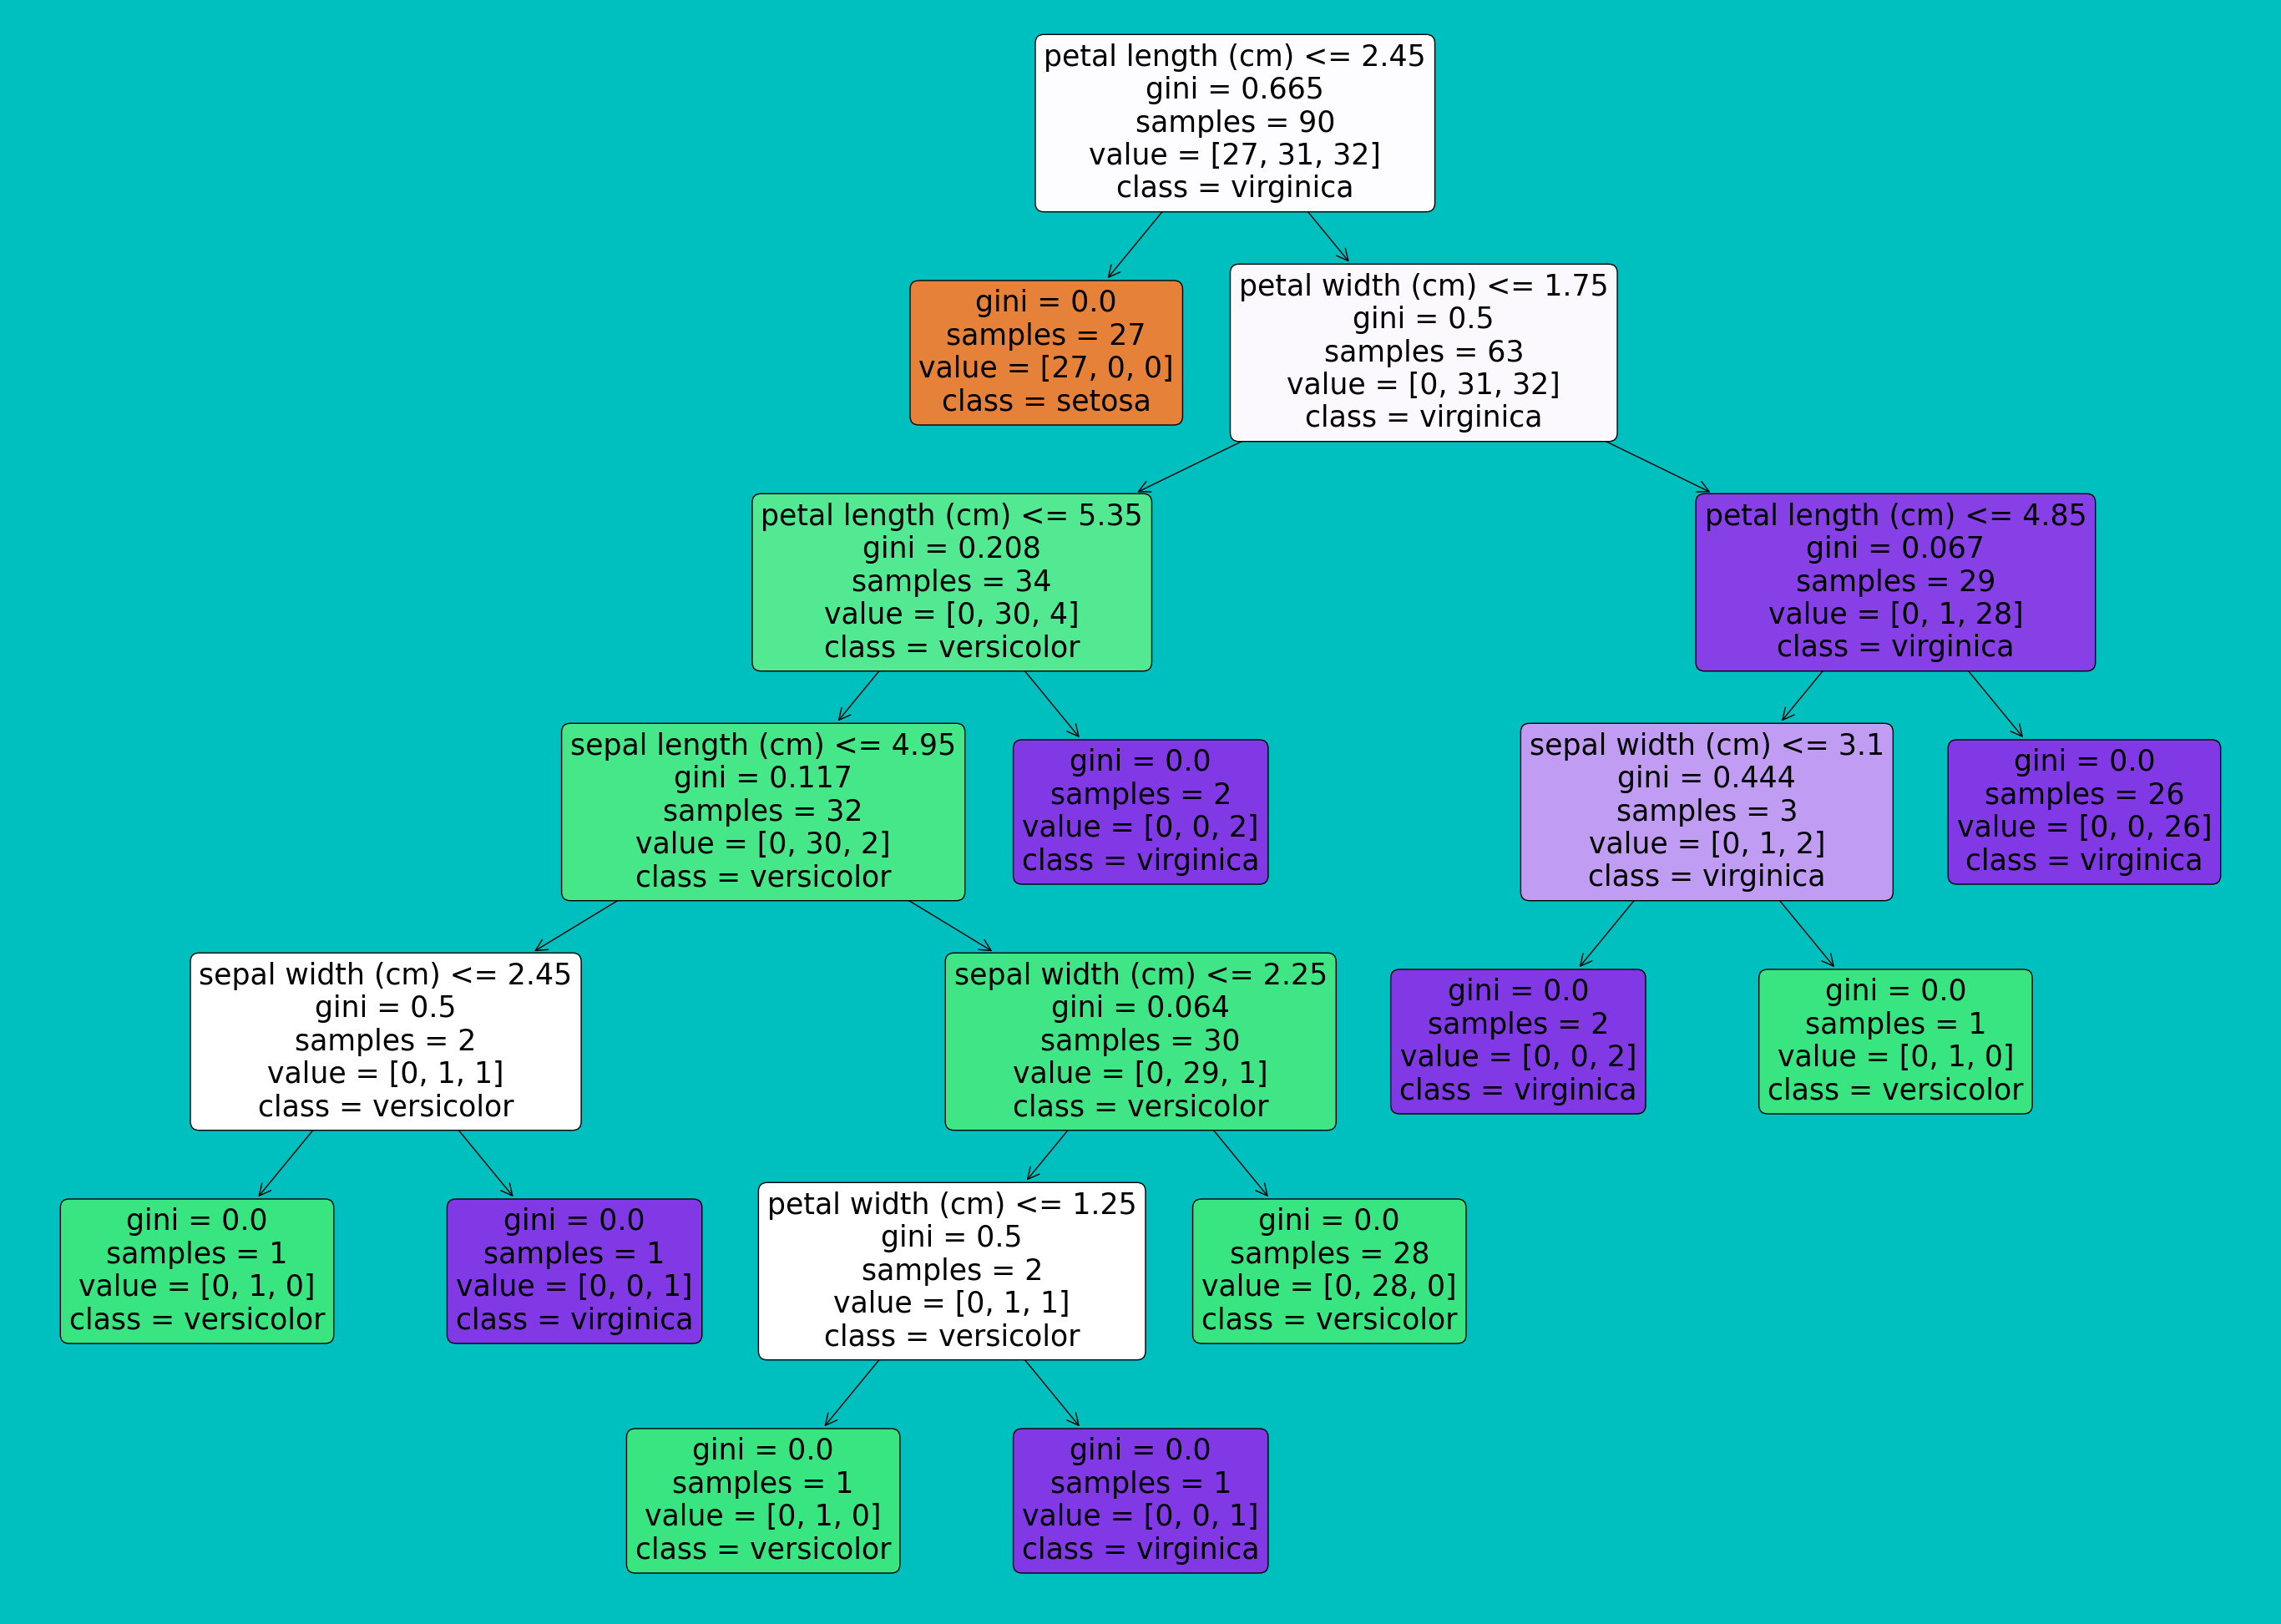

In [8]:
# using decision tree classifier

clf = DecisionTreeClassifier(random_state = 42)

clf.fit(X_train, y_train)

# As a Tree Diagram

plt.figure(figsize=(35,25), facecolor ='c')

a = tree.plot_tree(clf,

                   feature_names = feature_names,

                   class_names = labels,

                   rounded = True,

                   filled = True,

                   fontsize=25)
plt.show()

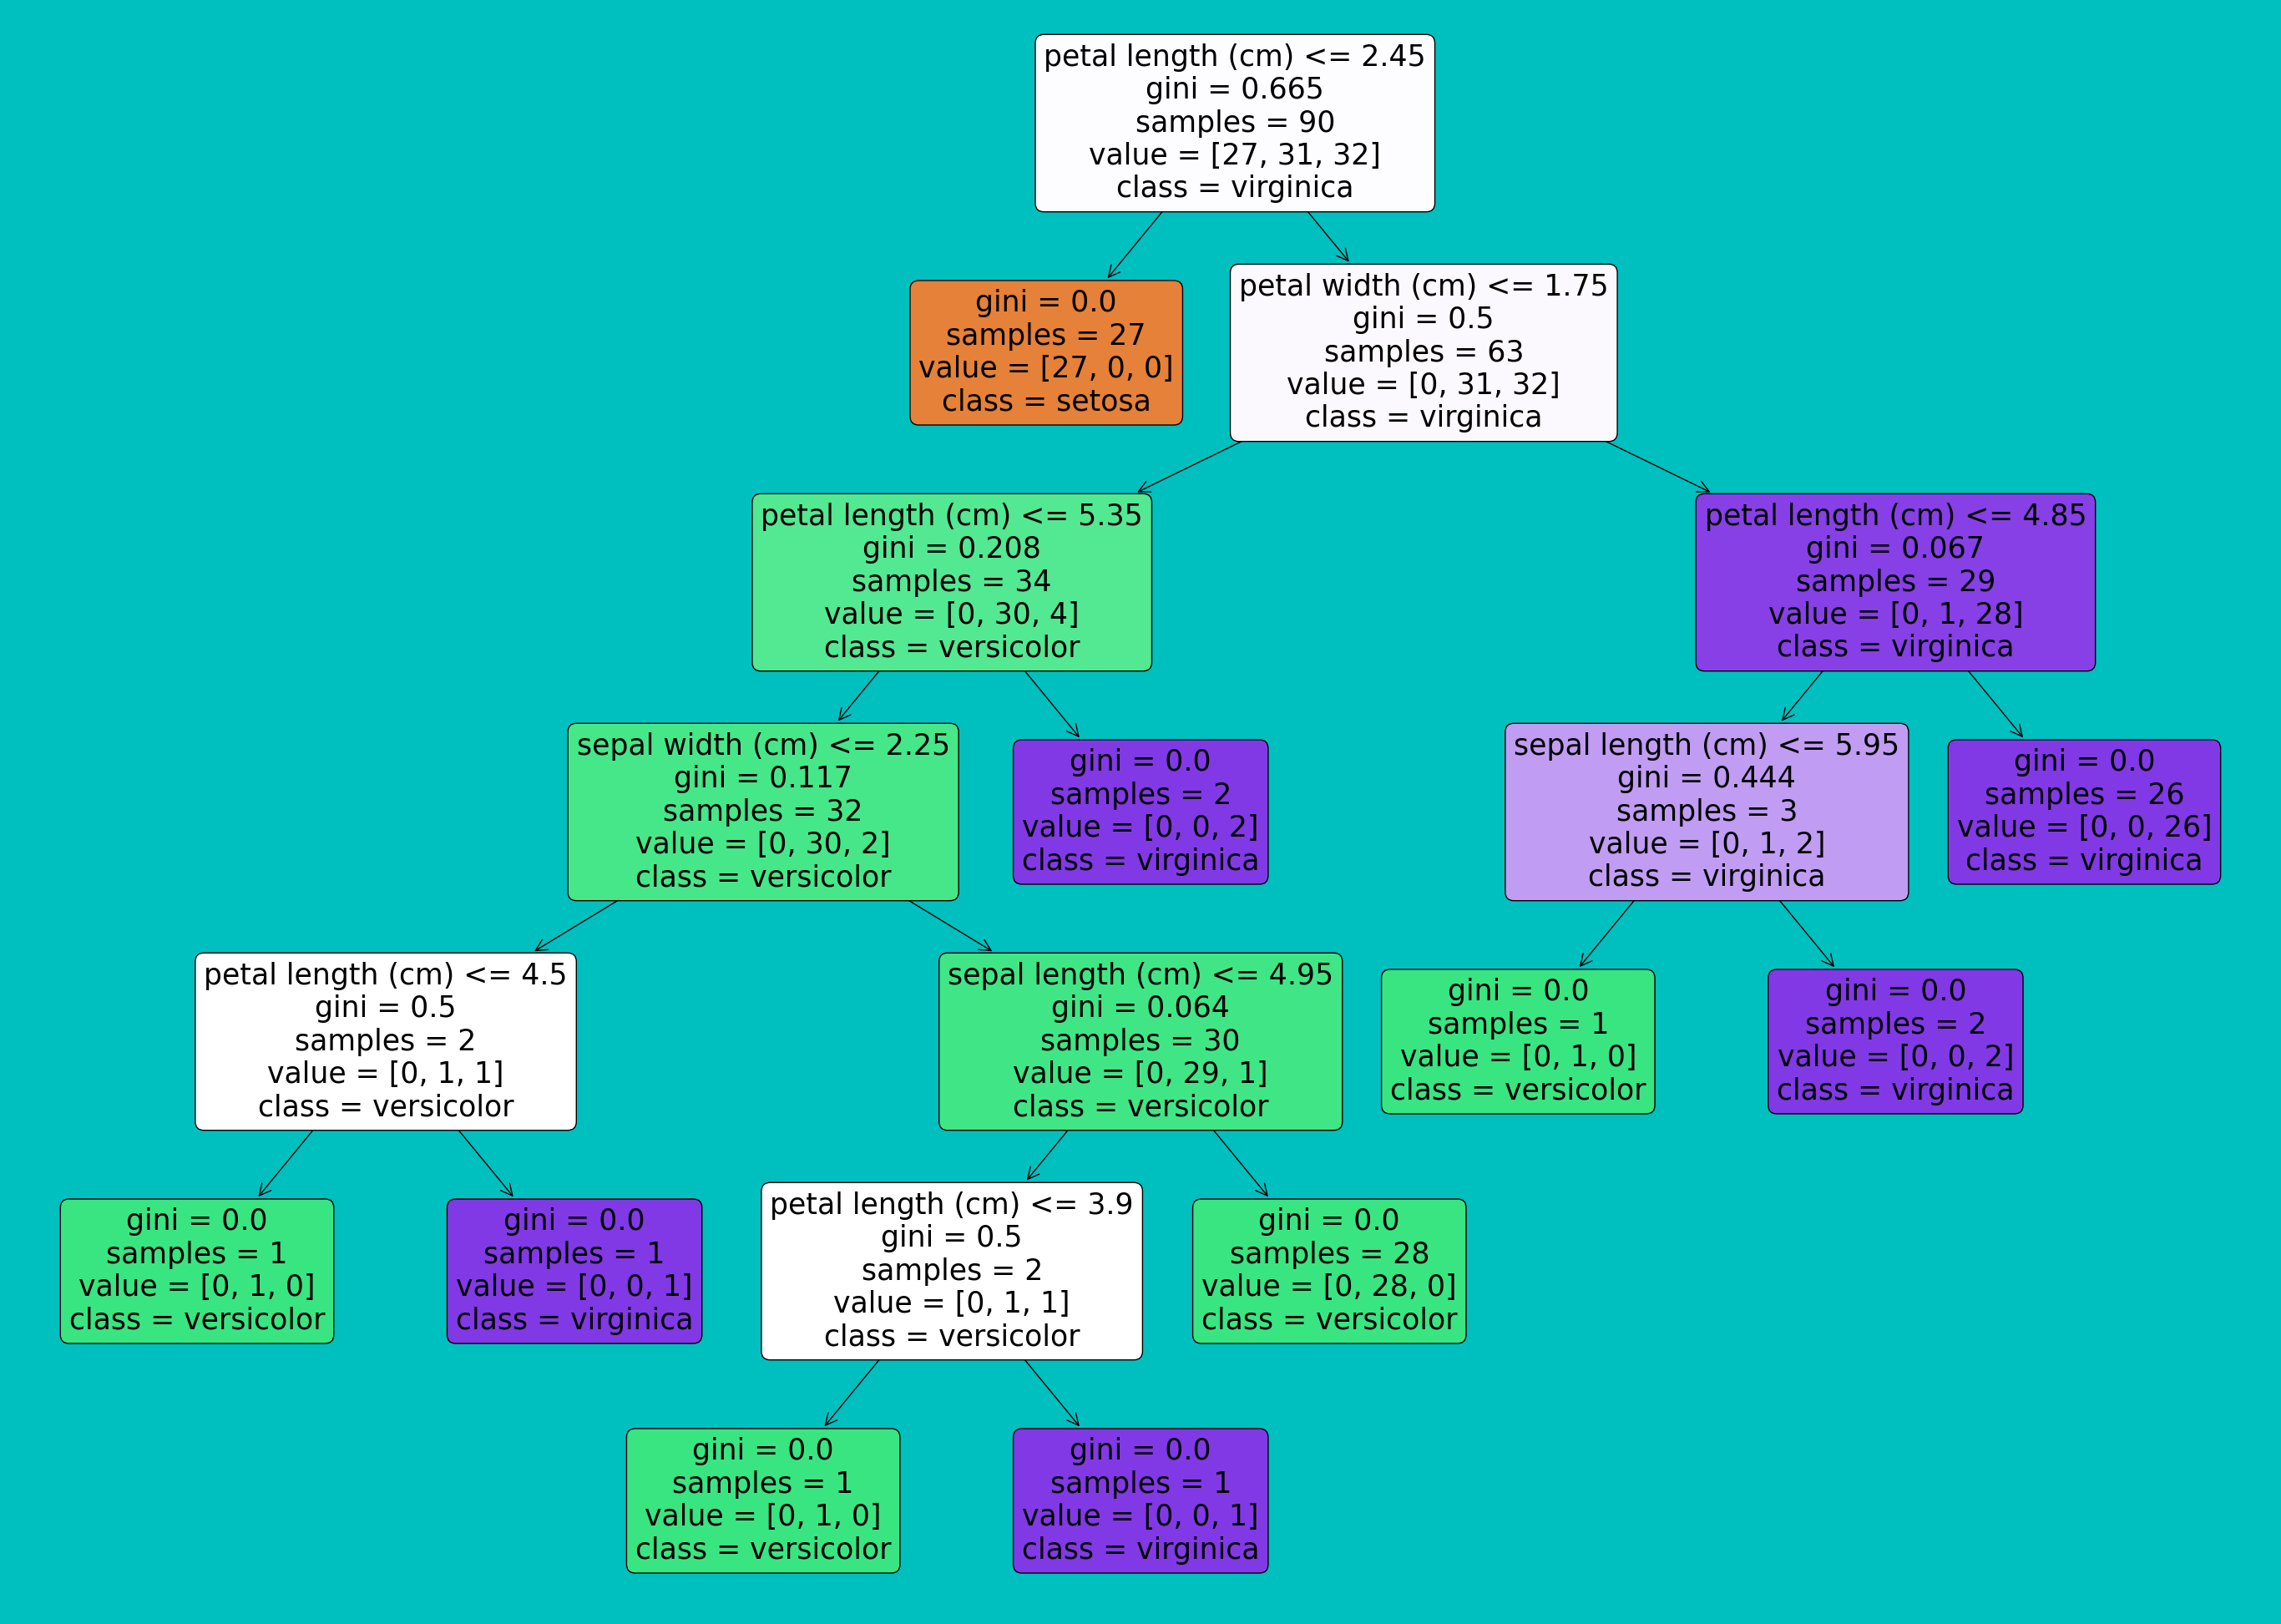

In [9]:
# impurity of a split will be measure criterion as gini
clf_gini = DecisionTreeClassifier(criterion = "gini")

clf_gini.fit(X_train, y_train)

# As a Tree Diagram

plt.figure(figsize=(35,25), facecolor ='c')

a = tree.plot_tree(clf_gini,

                   feature_names = feature_names,

                   class_names = labels,

                   rounded = True,

                   filled = True,

                   fontsize=25)
plt.show()

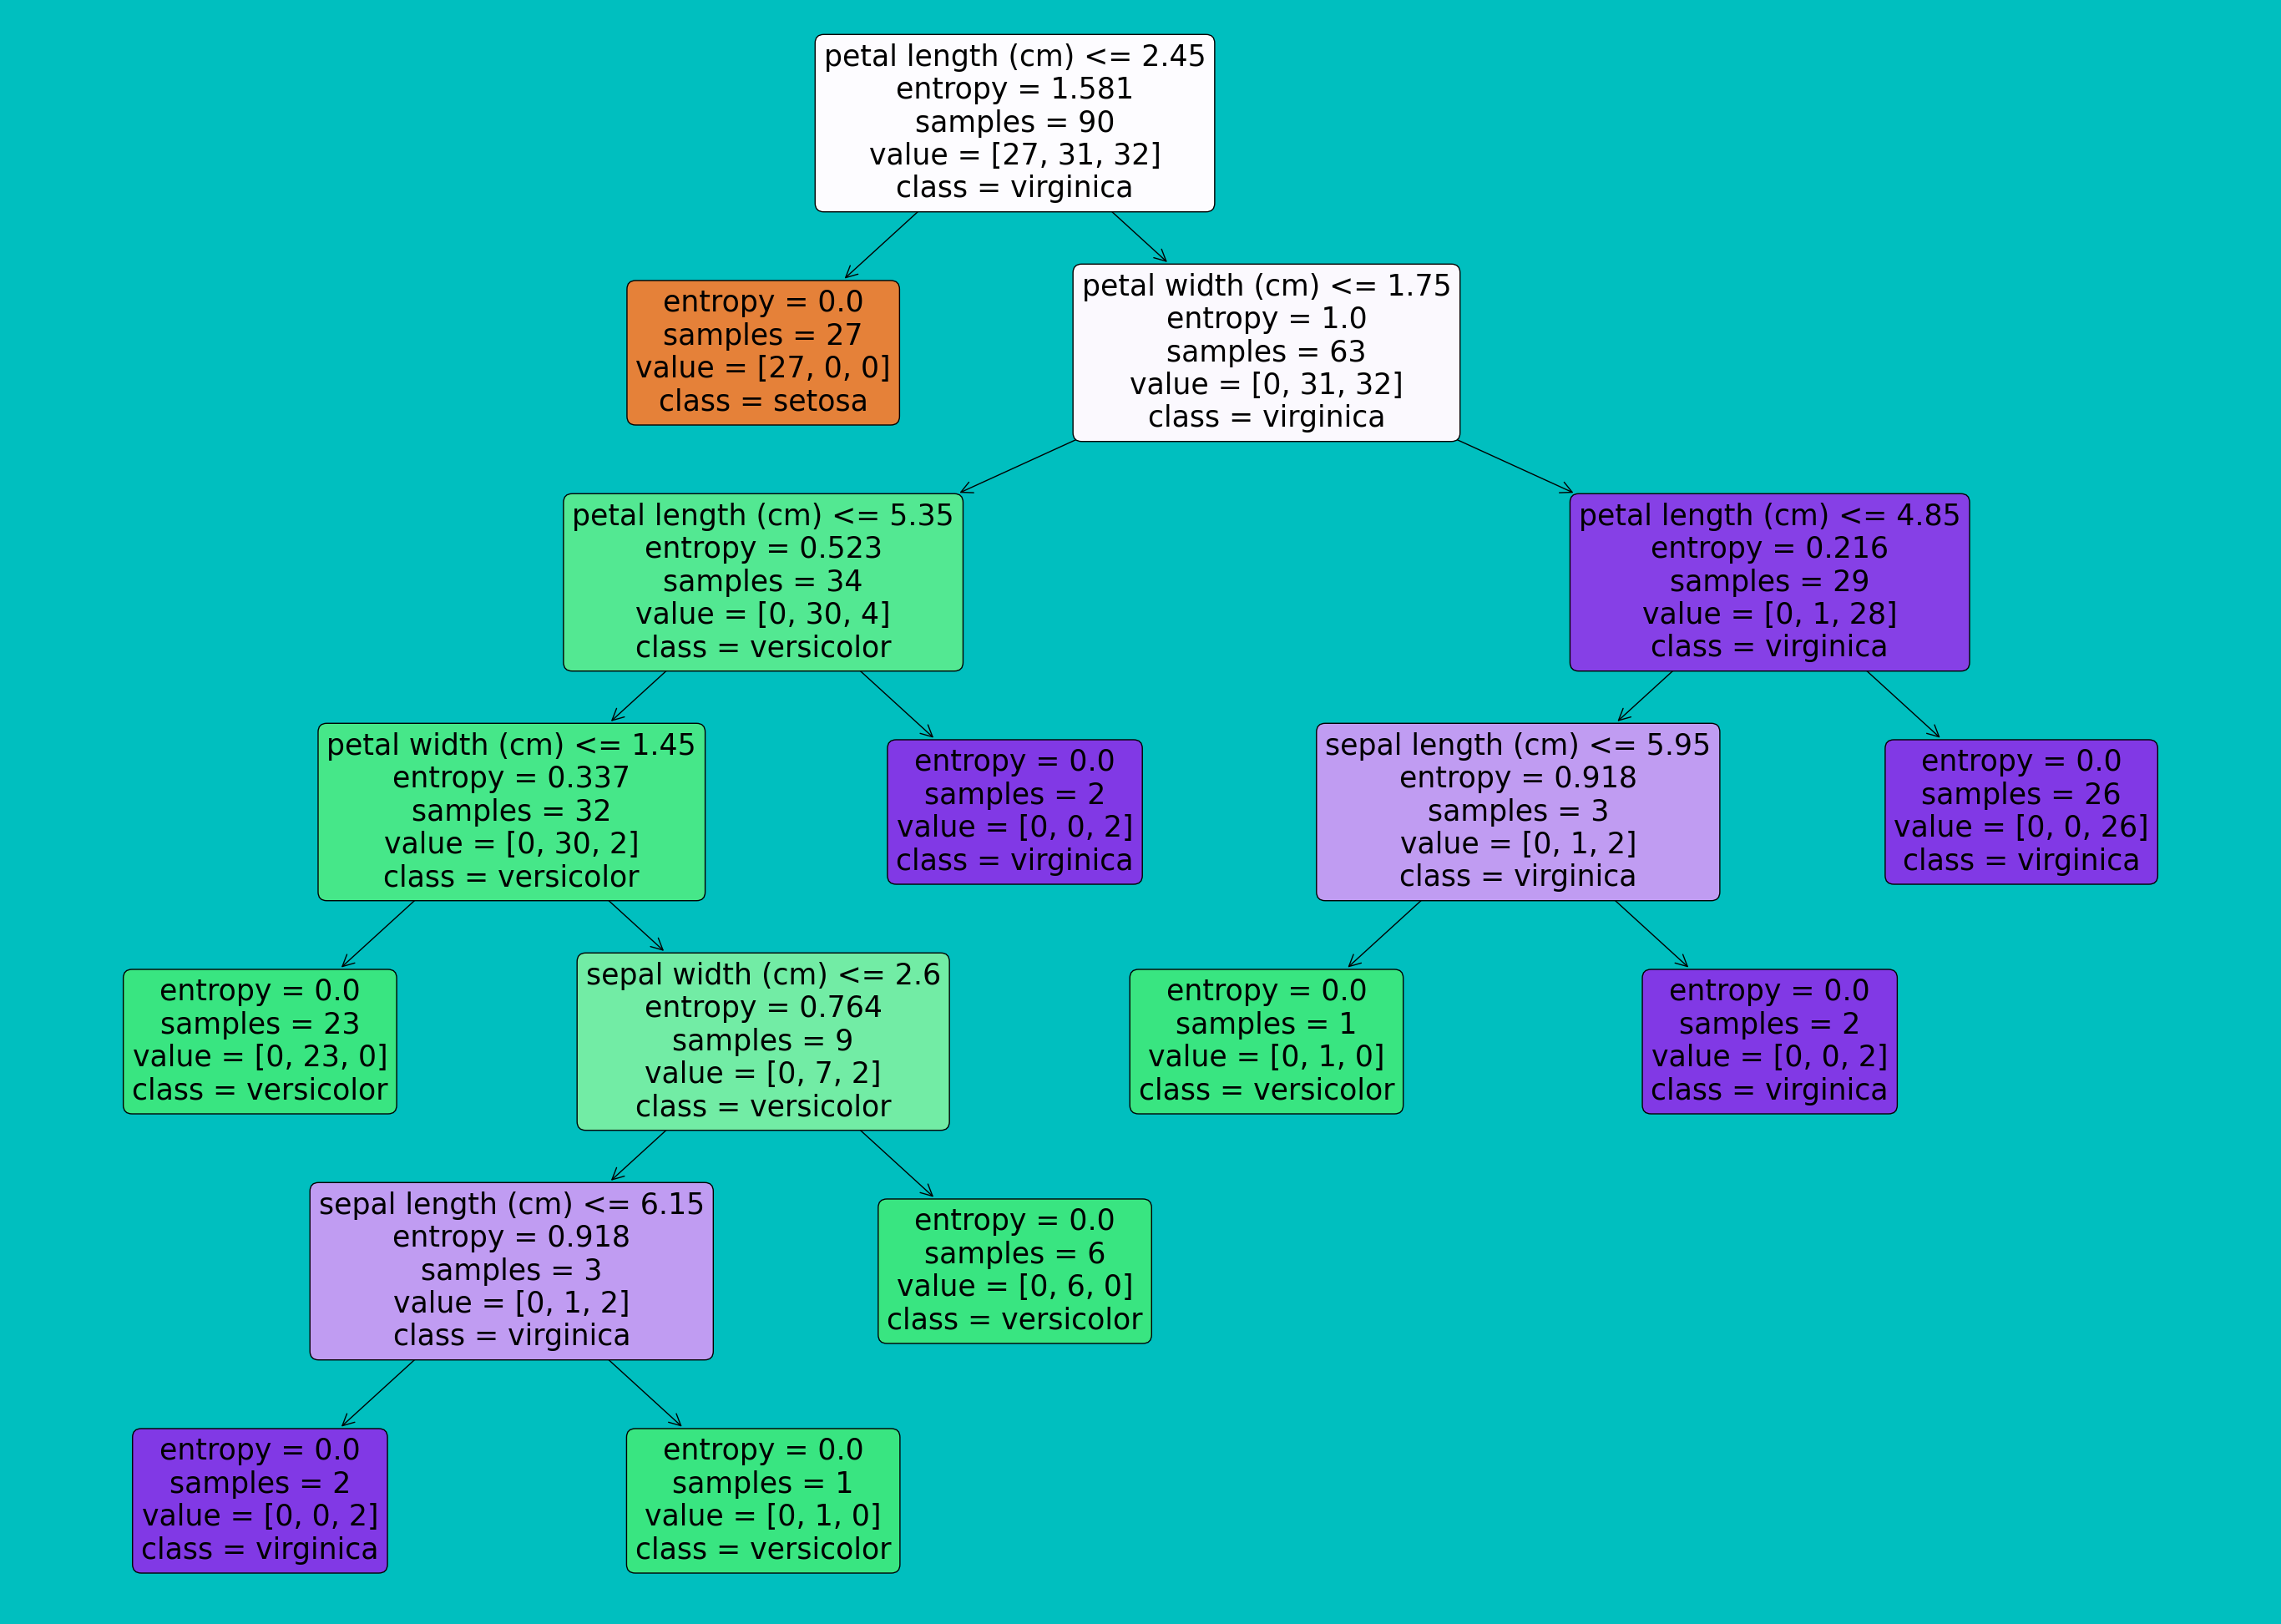

In [10]:
# impurity of a split will be measure criterion as entropy
clf_entro = DecisionTreeClassifier(criterion = "entropy")

clf_entro.fit(X_train, y_train)

# As a Tree Diagram

plt.figure(figsize=(35,25), facecolor ='c')

a = tree.plot_tree(clf_entro,

                   feature_names = feature_names,

                   class_names = labels,

                   rounded = True,

                   filled = True,

                   fontsize=25)
plt.show()

In [11]:
# impurity of a split will be measure criterion as loglos

clf_loglos = DecisionTreeClassifier(criterion = "log_loss")

#clf_loglos.fit(X_train, y_train)

# 1. As a Tree Diagram

"""plt.figure(figsize=(35,25), facecolor ='c')

a = tree.plot_tree(clf_loglos,

                   feature_names = feature_names,

                   class_names = labels,

                   rounded = True,

                   filled = True,

                   fontsize=25)
plt.show()"""

"plt.figure(figsize=(35,25), facecolor ='c')\n\na = tree.plot_tree(clf_loglos,\n\n                   feature_names = feature_names,\n\n                   class_names = labels,\n\n                   rounded = True,\n\n                   filled = True,\n\n                   fontsize=25)\nplt.show()"

In [12]:
# As a Text-Based Diagram

tree_rules = export_text(clf,feature_names = list(feature_names))

print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: setosa
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- sepal length (cm) <= 4.95
|   |   |   |   |--- sepal width (cm) <= 2.45
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- sepal width (cm) >  2.45
|   |   |   |   |   |--- class: virginica
|   |   |   |--- sepal length (cm) >  4.95
|   |   |   |   |--- sepal width (cm) <= 2.25
|   |   |   |   |   |--- petal width (cm) <= 1.25
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |   |--- petal width (cm) >  1.25
|   |   |   |   |   |   |--- class: virginica
|   |   |   |   |--- sepal width (cm) >  2.25
|   |   |   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- sepal wi

In [13]:
# prediction

test_pred_decision_tree = clf.predict(test_x)
test_pred_decision_tree

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor'], dtype=object)

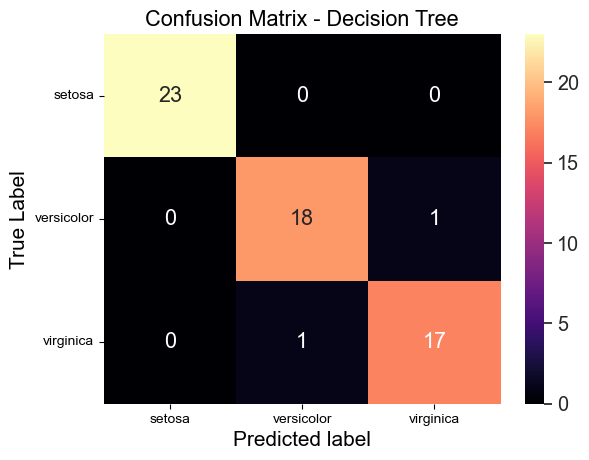

<Figure size 1000x700 with 0 Axes>

In [14]:
# just ploting confusion matrix

confusion_matrix = metrics.confusion_matrix(test_lab,test_pred_decision_tree)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [15]:
# saving predicted values to another variable

y_pred = test_pred_decision_tree
y = list(test_lab)
y

['versicolor',
 'setosa',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'setosa',
 'versicolor']

In [16]:
# Accuracy from scratch

Accuracy = ((sum(y==y_pred)/len(y))*100).round(2)
print("Accuracy from Scratch: ",Accuracy," %")

Accuracy from Scratch:  96.67  %


In [17]:
# Confusion Matrix from Scratch

uni_class = list(uni_class)
con_mat = np.zeros((len(uni_class),len(uni_class)),dtype = 'int64')
for i in range(len(y)):
    if y[i]==uni_class[0]:
        if y[i]==y_pred[i]:
            con_mat[0][0] += 1
        elif y_pred[i] == 2:
            con_mat[0][1] += 1
        else:
            con_mat[0][2] += 1

    elif y[i]==uni_class[1]:
        if y[i]==y_pred[i]:
            con_mat[1][1] += 1
        elif y_pred[i] == 1:
            con_mat[1][0] += 1
        else:
            con_mat[1][2] += 1

    else:
        if y[i]==y_pred[i]:
            con_mat[2][2] += 1
        elif y_pred[i] == 1:
            con_mat[2][0] += 1
        else:
            con_mat[2][1] += 1

print("Confusion matrix from Scratch")
con_mat

Confusion matrix from Scratch


array([[18,  0,  1],
       [ 0, 23,  0],
       [ 0,  1, 17]], dtype=int64)

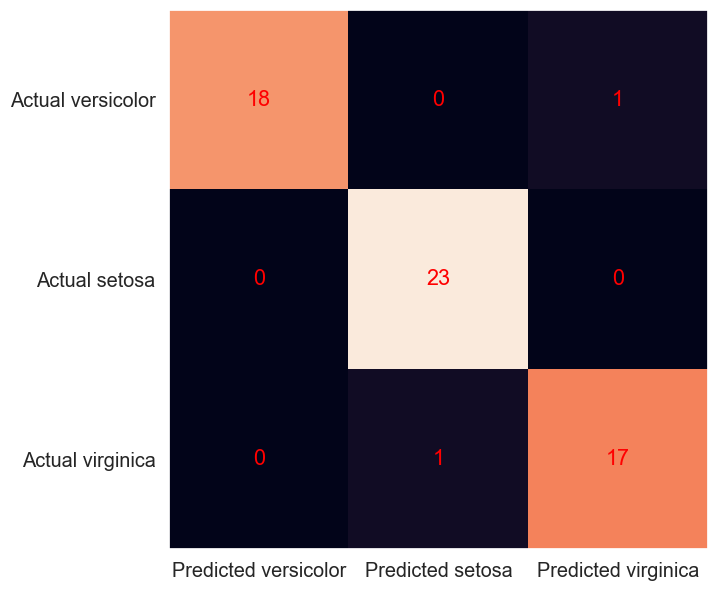

Plot of Confusion matrix from Scratch


In [18]:
# Confusion Matrix Plot

cm = con_mat
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=(f"Predicted {uni_class[0]}", f"Predicted {uni_class[1]}",f"Predicted {uni_class[2]}"))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=(f"Actual {uni_class[0]}", f"Actual {uni_class[1]}", f"Actual {uni_class[2]}"))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center',color = 'red')
plt.show()
print("Plot of Confusion matrix from Scratch")

In [19]:
# Classwise Accuracy from Scratch

acc1 = (((cm[0,0]+cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2])/
         (cm[0,0]+cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]+cm[0,1]+cm[0,2]+cm[1,0]+cm[2,0]))).round(2)
acc2 = (((cm[1,1]+cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2])/
         (cm[0,0]+cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]+cm[0,1]+cm[0,2]+cm[1,0]+cm[2,0]))).round(2)
acc3 = (((cm[2,2]+cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])/
         (cm[0,0]+cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]+cm[0,1]+cm[0,2]+cm[1,0]+cm[2,0]))).round(2)
print("Classwise Accuracy from Scratch")
print("Class1",acc1)
print("Class2",acc2)
print("Class3",acc3)
print("Overall accuracy",(acc1+acc2+acc3)/3)

Classwise Accuracy from Scratch
Class1 0.98
Class2 0.98
Class3 0.97
Overall accuracy 0.9766666666666666


In [20]:
# ClassWise Precision from Scratch

precision1 = ((cm[0,0]/(cm[0,0]+cm[1,0]+cm[2,0]))).round(2)
precision2 = ((cm[1,1]/(cm[0,1]+cm[1,1]+cm[2,1]))).round(2)
precision3 = ((cm[2,2]/(cm[0,2]+cm[1,2]+cm[2,2]))).round(2)

print("ClassWise Precision from Scratch")
print("Class1",precision1)
print("Class2",precision2)
print("Class3",precision3)

ClassWise Precision from Scratch
Class1 1.0
Class2 0.96
Class3 0.94


In [21]:
# ClassWise Recall from Scratch

recall1 = ((cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]))).round(2)
recall2 = ((cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]))).round(2)
recall3 = ((cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]))).round(2)

print("ClassWise Recall from Scratch")
print("Class1",recall1)
print("Class2",recall2)
print("Class3",recall3)

ClassWise Recall from Scratch
Class1 0.95
Class2 1.0
Class3 0.94


In [22]:
# ClassWise F1 Score from Scratch

f11 = (2*(precision1*recall1)/(precision1+recall1)).round(2)
f12 = (2*(precision2*recall2)/(precision2+recall2)).round(2)
f13 = (2*(precision3*recall3)/(precision3+recall3)).round(2)

print("ClassWise F1 Score from Scratch")
print("Class1",f11)
print("Class2",f12)
print("Class3",f13)

ClassWise F1 Score from Scratch
Class1 0.97
Class2 0.98
Class3 0.94


In [23]:
# Report from Scratch

print("Report from Scratch")
print("Class" ," Precision ","Recall "," F1 ")
print("Class1"," ",acc1," ","    ",recall1," ",f11 )
print("Class2"," ",acc2," ","   ",recall2," ",f12 )
print("Class3"," ",acc3," ","  ",recall3," ",f13 )

Report from Scratch
Class  Precision  Recall   F1 
Class1   0.98        0.95   0.97
Class2   0.98       1.0   0.98
Class3   0.97      0.94   0.94


# Part 2 on MNIST DataSet

In [24]:
# importing mnist data

data_mnist = pd.read_csv("mnist_train.csv")
data_mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# making features and labels apart

x = data_mnist.drop(['label'],axis = 1).to_numpy()
y = data_mnist['label'].astype(str).to_numpy()

print("features",x[:5])
print("target",y[:5])

features [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
target ['5' '0' '4' '1' '9']


In [26]:
# modifying data

feature_names = data_mnist.drop(['label'],axis = 1).columns
uni_class = set(y)
labels = data_mnist['label'].astype(str).unique()

print("Modification Done")

Modification Done


In [28]:
#split the dataset

X_train, test_x, y_train, test_lab = train_test_split(x,y,test_size = 0.4,random_state = 42)
X_train, test_x, y_train, test_lab

print("training data ")
print("features :",X_train[:5],"labels :",y_train[:5])
print("testing data")
print("testing/validation data")
print("feature for testing :",test_x[:5],"true labels :",test_lab[:5])

training data 
features : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] labels : ['5' '9' '4' '2' '9']
testing data
testing/validation data
feature for testing : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] true labels : ['7' '3' '8' '9' '3']


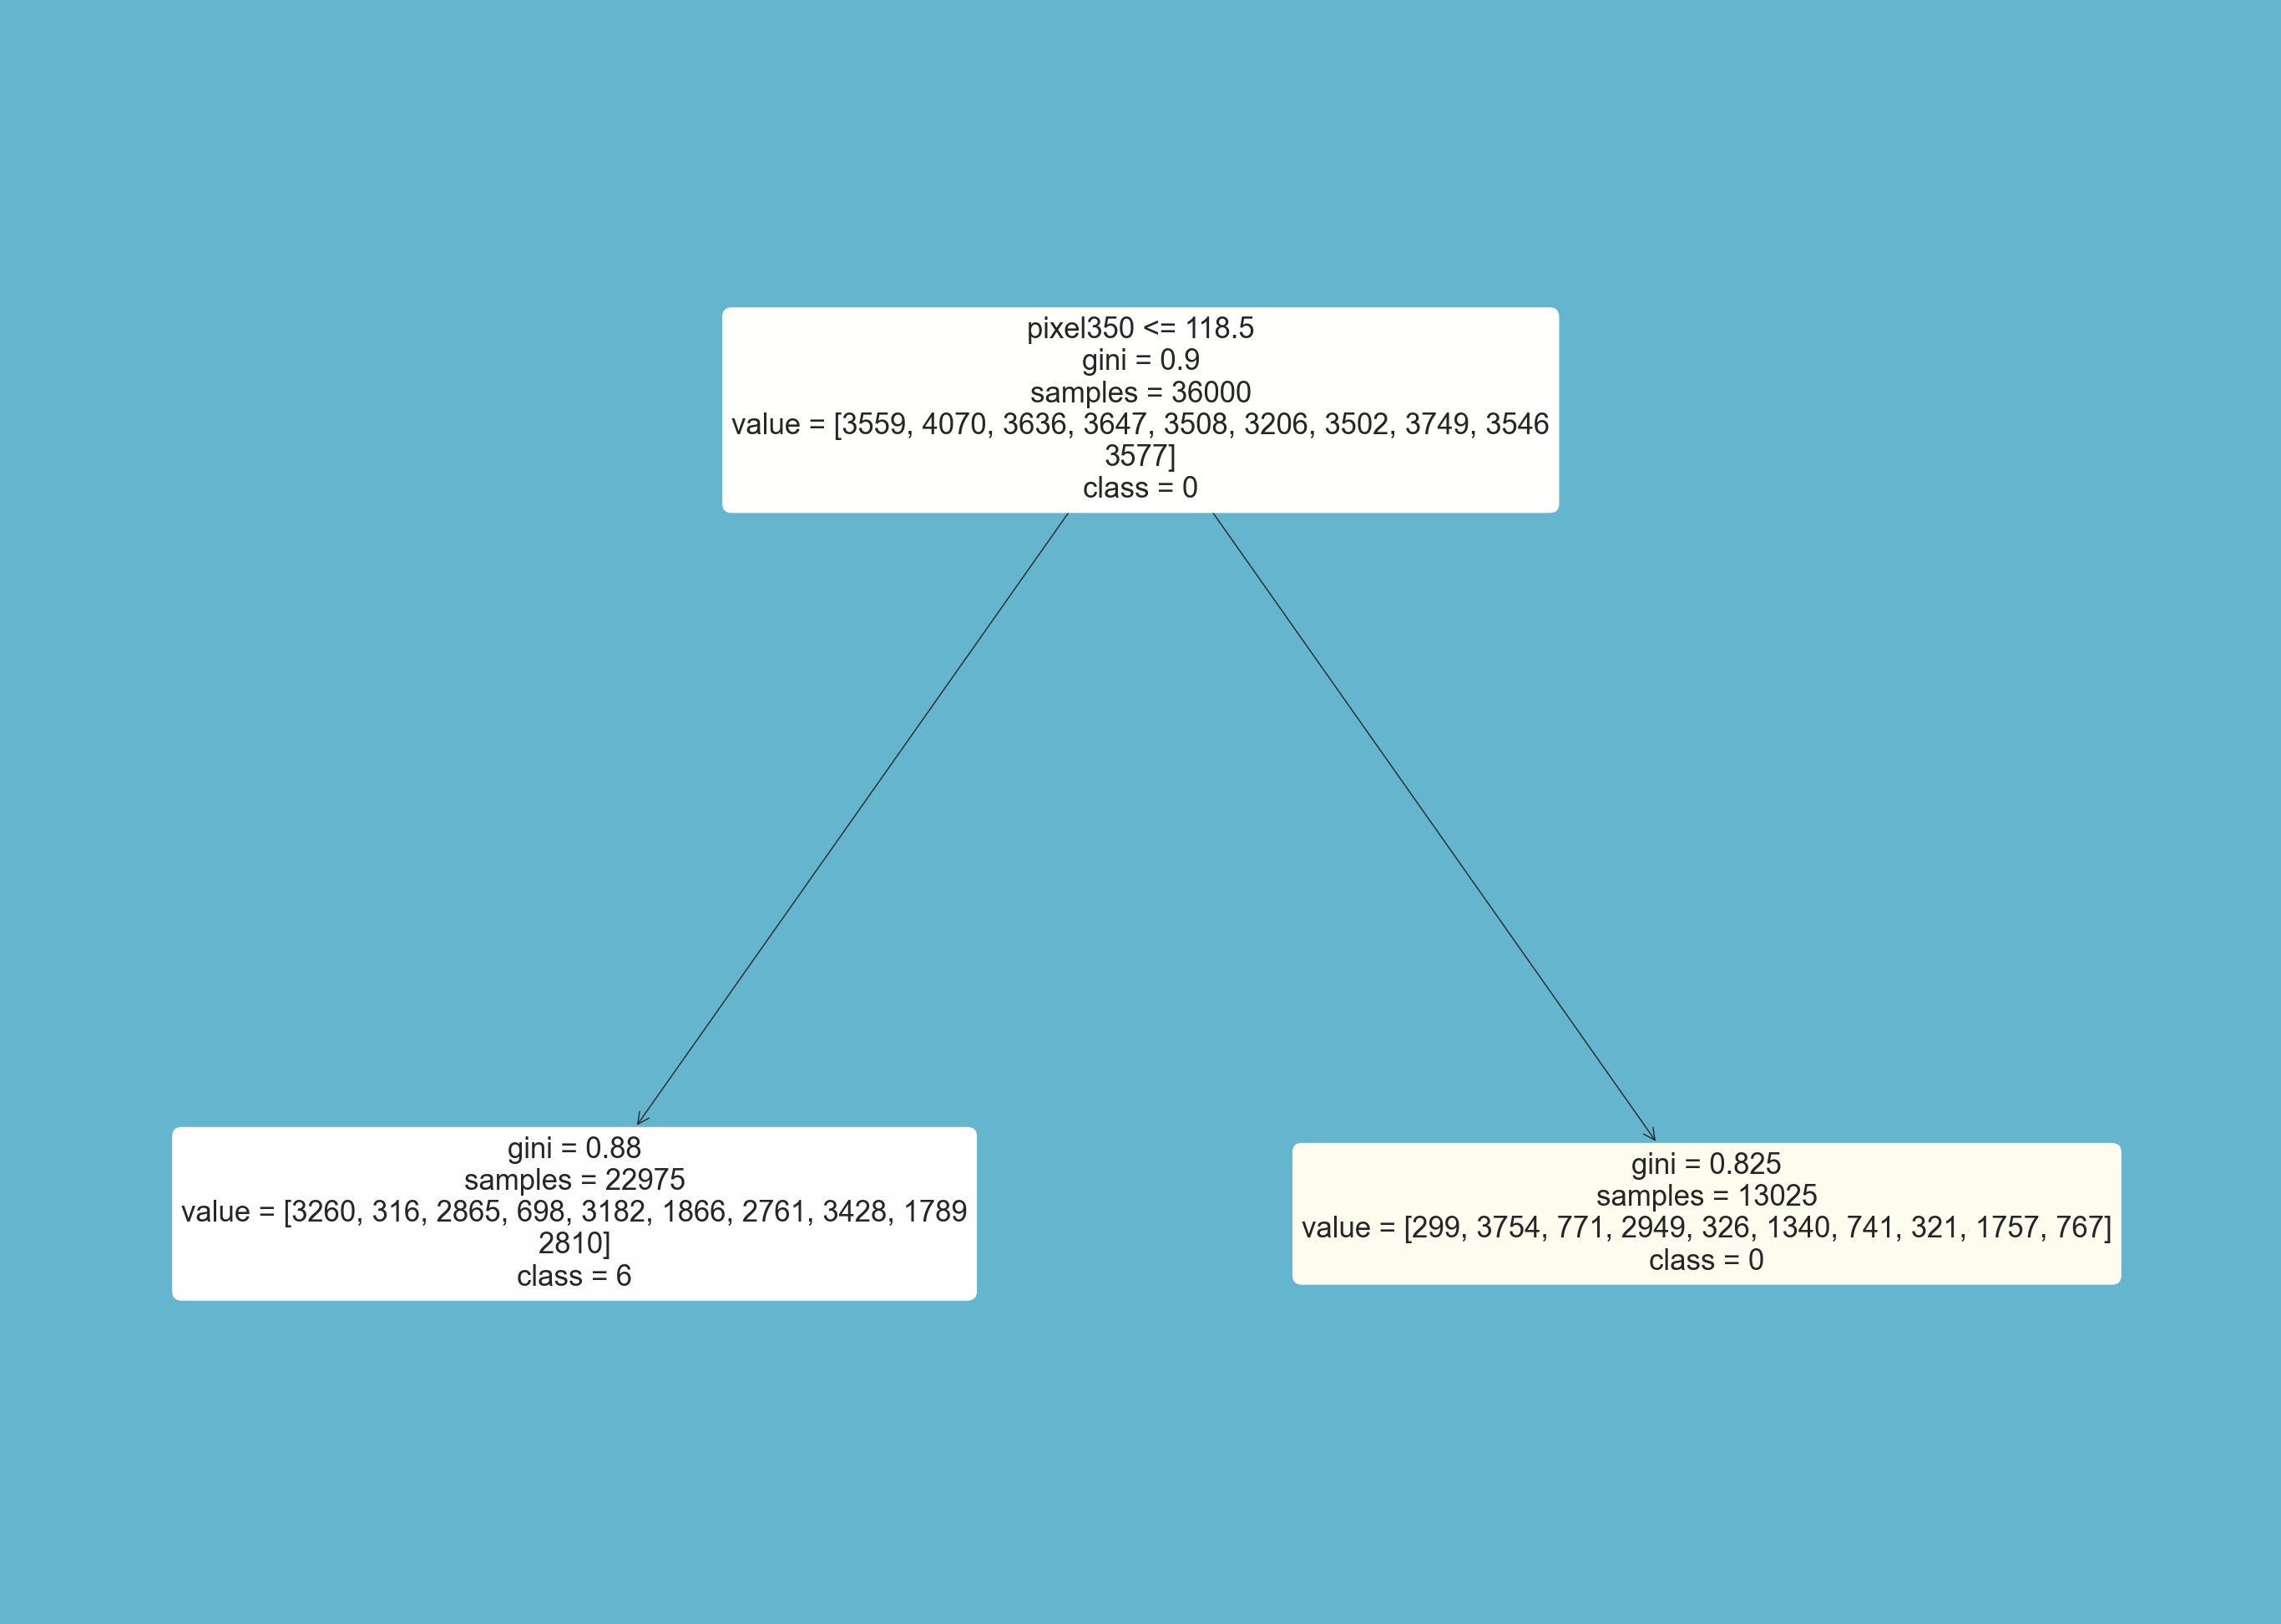

In [29]:
# impurity of a split will be measure criterion as gini
clf_gini = DecisionTreeClassifier(criterion = "gini",max_depth = 1)

clf_gini.fit(X_train, y_train)

# As a Tree Diagram

plt.figure(figsize=(35,25), facecolor ='c')

a = tree.plot_tree(clf_gini,

                   feature_names = feature_names,

                   class_names = labels,

                   rounded = True,

                   filled = True,

                   fontsize=25)
plt.show()

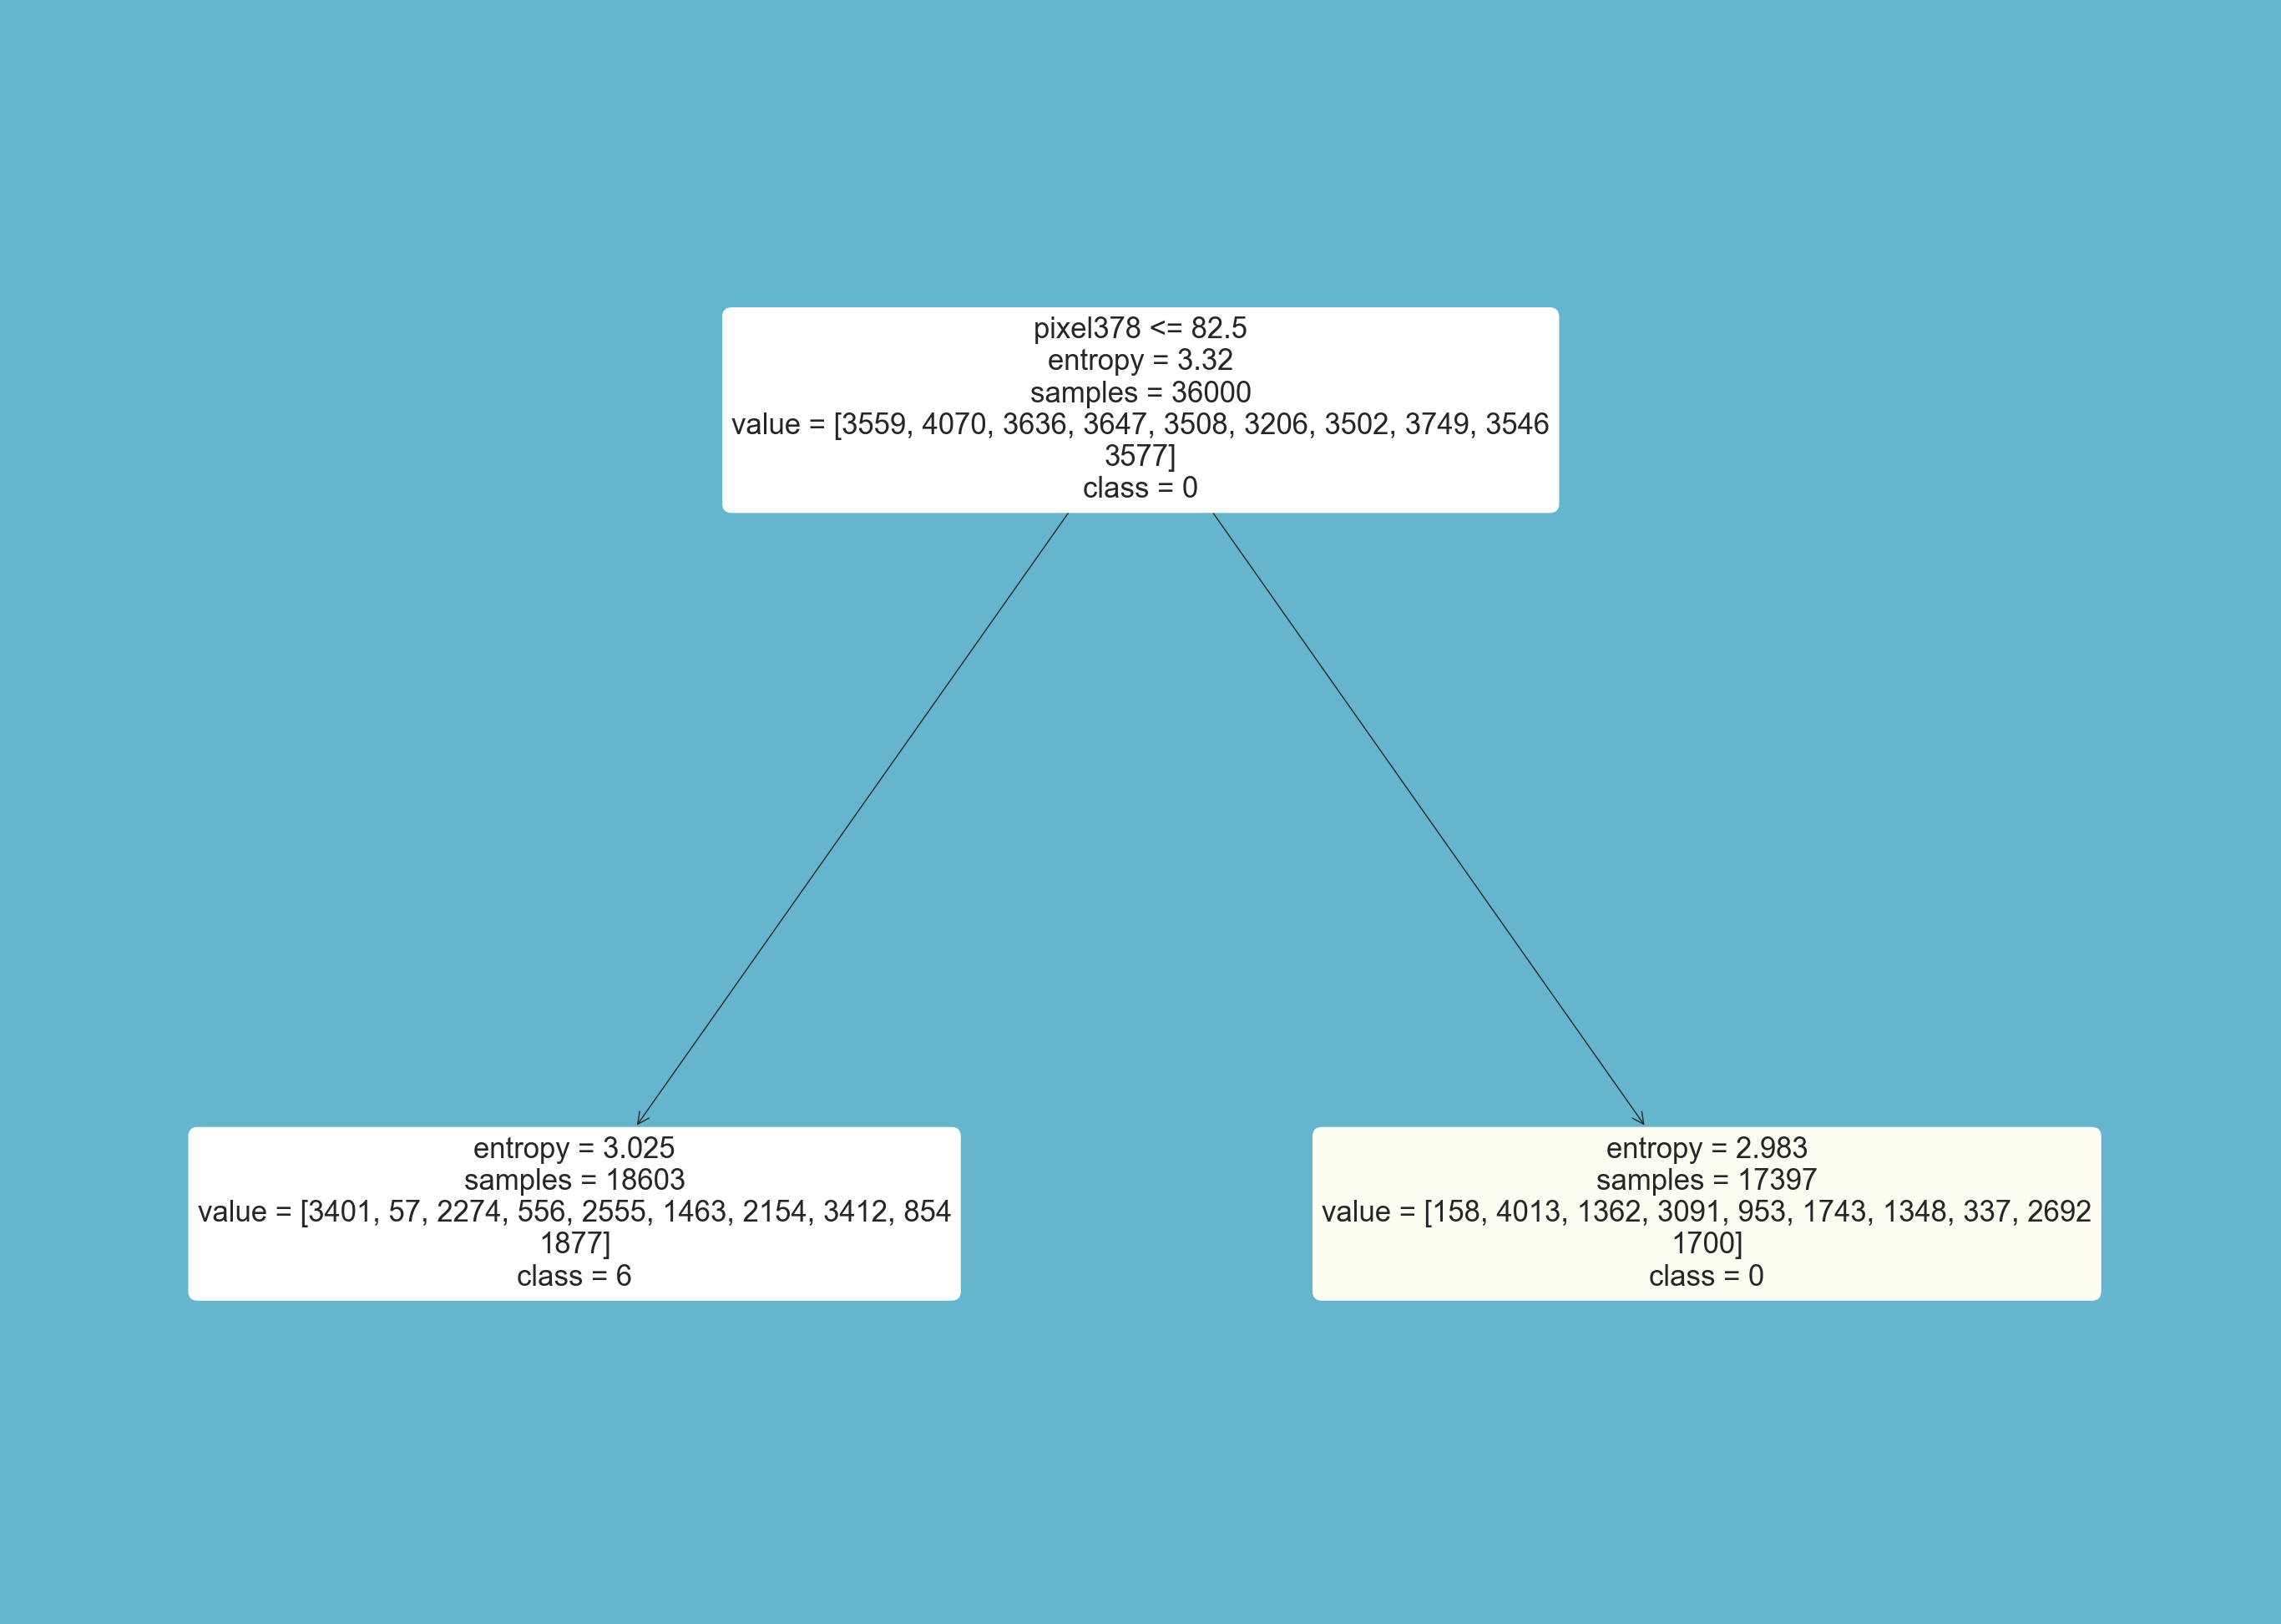

In [30]:
# impurity of a split will be measure criterion as entropy
clf_entro = DecisionTreeClassifier(criterion = "entropy",max_depth = 1)

clf_entro.fit(X_train, y_train)

# As a Tree Diagram

plt.figure(figsize=(35,25), facecolor ='c')

a = tree.plot_tree(clf_entro,

                   feature_names = feature_names,

                   class_names = labels,

                   rounded = True,

                   filled = True,

                   fontsize=25)
plt.show()

In [31]:
# impurity of a split will be measure criterion as loglos

from sklearn.metrics import log_loss
clf_loglos = DecisionTreeClassifier(criterion = "log_loss",max_depth = 1)

#clf_loglos.fit(X_train, y_train)

# 1. As a Tree Diagram

"""plt.figure(figsize=(35,25), facecolor ='c')

a = tree.plot_tree(clf_loglos,

                   feature_names = feature_names,

                   class_names = labels,

                   rounded = True,

                   filled = True,

                   fontsize=25)
plt.show()"""

"plt.figure(figsize=(35,25), facecolor ='c')\n\na = tree.plot_tree(clf_loglos,\n\n                   feature_names = feature_names,\n\n                   class_names = labels,\n\n                   rounded = True,\n\n                   filled = True,\n\n                   fontsize=25)\nplt.show()"

In [32]:
y = data_mnist['label'].astype('int64').to_numpy()
labels = data_mnist['label'].astype('int64').unique()

#split the dataset

X_train, test_x, y_train, test_lab = train_test_split(x,y,test_size = 0.4,random_state = 42)
X_train, test_x, y_train, test_lab

print("training data ")
print("features :",X_train[:5],"labels :",y_train[:5])
print("testing data")
print("testing/validation data")
print("feature for testing :",test_x[:5],"true labels :",test_lab[:5])

training data 
features : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] labels : [5 9 4 2 9]
testing data
testing/validation data
feature for testing : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] true labels : [7 3 8 9 3]


In [33]:
# using decision tree classifier this will be used to predict label else other are just show the plot

clf = DecisionTreeClassifier(random_state = 42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
# As a Text-Based Diagram

tree_rules = export_text(clf,feature_names = list(feature_names))

#print(tree_rules)

In [35]:
# prediction

test_pred_decision_tree = clf.predict(test_x)

test_pred_decision_tree

array([7, 3, 8, ..., 4, 5, 2], dtype=int64)

In [36]:
# modifying dtype to int

y_pred = test_pred_decision_tree
y_pred = y_pred.astype('int64')
y = list(test_lab.astype('int64'))

print("Modification Done in dtype")

Modification Done in dtype


In [37]:
# Accuracy from scratch

Accuracy = ((sum(y==y_pred)/len(y))*100).round(2)
print("Accuracy from Scratch: ",Accuracy," %")

Accuracy from Scratch:  85.9  %


In [38]:
# confusion matrix from scratch

con_mat = np.zeros((10,10),dtype = 'int64')
y_test = y

for i in range(len(y_test)):
    if y_test[i]==0:
        if y_test[i]==y_pred[i]:
            con_mat[0][0] += 1
        elif y_pred[i] == 1:
            con_mat[0][1] += 1
        elif y_pred[i] == 2:
            con_mat[0][2] += 1
        elif y_pred[i] == 3:
            con_mat[0][3] += 1
        elif y_pred[i] == 4:
            con_mat[0][4] += 1
        elif y_pred[i] == 5:
            con_mat[0][5] += 1
        elif y_pred[i] == 6:
            con_mat[0][6] += 1
        elif y_pred[i]==7:
            con_mat[0][7] += 1
        elif y_pred[i]==8:
            con_mat[0][8] += 1
        elif y_pred[i]==9:
            con_mat[0][9] += 1
        else:
            continue
    elif y_test[i]==1:
        if y_test[i]==y_pred[i]:
            con_mat[1][1] += 1
        elif y_pred[i] == 0:
            con_mat[1][0] += 1
        elif y_pred[i] == 2:
            con_mat[1][2] += 1
        elif y_pred[i] == 3:
            con_mat[1][3] += 1
        elif y_pred[i] == 4:
            con_mat[1][4] += 1
        elif y_pred[i] == 5:
            con_mat[1][5] += 1
        elif y_pred[i] == 6:
            con_mat[1][6] += 1
        elif y_pred[i]==7:
            con_mat[1][7] += 1
        elif y_pred[i]==8:
            con_mat[1][8] += 1
        elif y_pred[i]==9:
            con_mat[1][9] += 1
        else:
            continue 
    elif y_test[i]==2:
        if y_test[i]==y_pred[i]:
            con_mat[2][2] += 1
        elif y_pred[i] == 1:
            con_mat[2][1] += 1
        elif y_pred[i] == 0:
            con_mat[2][0] += 1
        elif y_pred[i] == 3:
            con_mat[2][3] += 1
        elif y_pred[i] == 4:
            con_mat[2][4] += 1
        elif y_pred[i] == 5:
            con_mat[2][5] += 1
        elif y_pred[i] == 6:
            con_mat[2][6] += 1
        elif y_pred[i]==7:
            con_mat[2][7] += 1
        elif y_pred[i]==8:
            con_mat[2][8] += 1
        elif y_pred[i]==9:
            con_mat[2][9] += 1
        else:
            continue
    elif y_test[i]==3:
        if y_test[i]==y_pred[i]:
            con_mat[3][3] += 1
        elif y_pred[i] == 1:
            con_mat[3][1] += 1
        elif y_pred[i] == 2:
            con_mat[3][2] += 1
        elif y_pred[i] == 0:
            con_mat[3][0] += 1
        elif y_pred[i] == 4:
            con_mat[3][4] += 1
        elif y_pred[i] == 5:
            con_mat[3][5] += 1
        elif y_pred[i] == 6:
            con_mat[3][6] += 1
        elif y_pred[i]==7:
            con_mat[3][7] += 1
        elif y_pred[i]==8:
            con_mat[3][8] += 1
        elif y_pred[i]==9:
            con_mat[3][9] += 1
        else:
            continue 
    elif y_test[i]==4:
        if y_test[i]==y_pred[i]:
            con_mat[4][4] += 1
        elif y_pred[i] == 1:
            con_mat[4][1] += 1
        elif y_pred[i] == 2:
            con_mat[4][2] += 1
        elif y_pred[i] == 3:
            con_mat[4][3] += 1
        elif y_pred[i] == 0:
            con_mat[4][0] += 1
        elif y_pred[i] == 5:
            con_mat[4][5] += 1
        elif y_pred[i] == 6:
            con_mat[4][6] += 1
        elif y_pred[i]==7:
            con_mat[4][7] += 1
        elif y_pred[i]==8:
            con_mat[4][8] += 1
        elif y_pred[i]==9:
            con_mat[4][9] += 1
        else:
            continue
    elif y_test[i]==5:
        if y_test[i]==y_pred[i]:
            con_mat[5][5] += 1
        elif y_pred[i] == 1:
            con_mat[5][1] += 1
        elif y_pred[i] == 2:
            con_mat[5][2] += 1
        elif y_pred[i] == 3:
            con_mat[5][3] += 1
        elif y_pred[i] == 4:
            con_mat[5][4] += 1
        elif y_pred[i] == 0:
            con_mat[5][0] += 1
        elif y_pred[i] == 6:
            con_mat[5][6] += 1
        elif y_pred[i]==7:
            con_mat[5][7] += 1
        elif y_pred[i]==8:
            con_mat[5][8] += 1
        elif y_pred[i]==9:
            con_mat[5][9] += 1
        else:
            continue
            
    elif y_test[i]==6:
        if y_test[i]==y_pred[i]:
            con_mat[6][6] += 1
        elif y_pred[i] == 1:
            con_mat[6][1] += 1
        elif y_pred[i] == 2:
            con_mat[6][2] += 1
        elif y_pred[i] == 3:
            con_mat[6][3] += 1
        elif y_pred[i] == 4:
            con_mat[6][4] += 1
        elif y_pred[i] == 5:
            con_mat[6][5] += 1
        elif y_pred[i] == 0:
            con_mat[6][0] += 1
        elif y_pred[i]==7:
            con_mat[6][7] += 1
        elif y_pred[i]==8:
            con_mat[6][8] += 1
        elif y_pred[i]==9:
            con_mat[6][9] += 1
        else:
            continue
    elif y_test[i]==7:
        if y_test[i]==y_pred[i]:
            con_mat[7][7] += 1
        elif y_pred[i] == 1:
            con_mat[7][1] += 1
        elif y_pred[i] == 2:
            con_mat[7][2] += 1
        elif y_pred[i] == 3:
            con_mat[7][3] += 1
        elif y_pred[i] == 4:
            con_mat[7][4] += 1
        elif y_pred[i] == 5:
            con_mat[7][5] += 1
        elif y_pred[i] == 6:
            con_mat[7][6] += 1
        elif y_pred[i]==0:
            con_mat[7][0] += 1
        elif y_pred[i]==8:
            con_mat[7][8] += 1
        elif y_pred[i]==9:
            con_mat[7][9] += 1
        else:
            continue
    elif y_test[i]==8:
        if y_test[i]==y_pred[i]:
            con_mat[8][8] += 1
        elif y_pred[i] == 1:
            con_mat[8][1] += 1
        elif y_pred[i] == 2:
            con_mat[8][2] += 1
        elif y_pred[i] == 3:
            con_mat[8][3] += 1
        elif y_pred[i] == 4:
            con_mat[8][4] += 1
        elif y_pred[i] == 5:
            con_mat[8][5] += 1
        elif y_pred[i] == 6:
            con_mat[8][6] += 1
        elif y_pred[i]==7:
            con_mat[8][7] += 1
        elif y_pred[i]==0:
            con_mat[8][8] += 1
        elif y_pred[i]==9:
            con_mat[8][9] += 1
        else:
            continue
    else:
        if y_test[i]==y_pred[i]:
            con_mat[9][9] += 1
        elif y_pred[i] == 1:
            con_mat[9][1] += 1
        elif y_pred[i] == 2:
            con_mat[9][2] += 1
        elif y_pred[i] == 3:
            con_mat[9][3] += 1
        elif y_pred[i] == 4:
            con_mat[9][4] += 1
        elif y_pred[i] == 5:
            con_mat[9][5] += 1
        elif y_pred[i] == 6:
            con_mat[9][6] += 1
        elif y_pred[i]==7:
            con_mat[9][7] += 1
        elif y_pred[i]==8:
            con_mat[9][8] += 1
        elif y_pred[i]==0:
            con_mat[9][0] += 1
        else:
            continue 


            
print("Confusion Matrix from Scratch")
con_mat

Confusion Matrix from Scratch


array([[2124,    0,   27,   31,   21,   55,   35,    5,   43,   23],
       [   3, 2541,   22,   18,   19,    8,   12,   11,   31,    7],
       [  33,   35, 1966,   62,   24,   21,   54,   53,   52,   22],
       [  14,   12,   86, 2038,   15,  129,   25,   32,   87,   46],
       [  12,   16,   28,   16, 1994,   16,   26,   38,   49,  139],
       [  37,   18,   21,  118,   25, 1817,   57,   13,   67,   42],
       [  38,   18,   36,   16,   54,   58, 2135,    6,   43,   12],
       [   7,   17,   63,   29,   28,   13,    4, 2258,   29,   68],
       [   0,   43,   73,   84,   47,   79,   53,   33, 1813,   80],
       [  17,   16,   27,   58,  114,   49,   11,   63,   64, 1953]],
      dtype=int64)

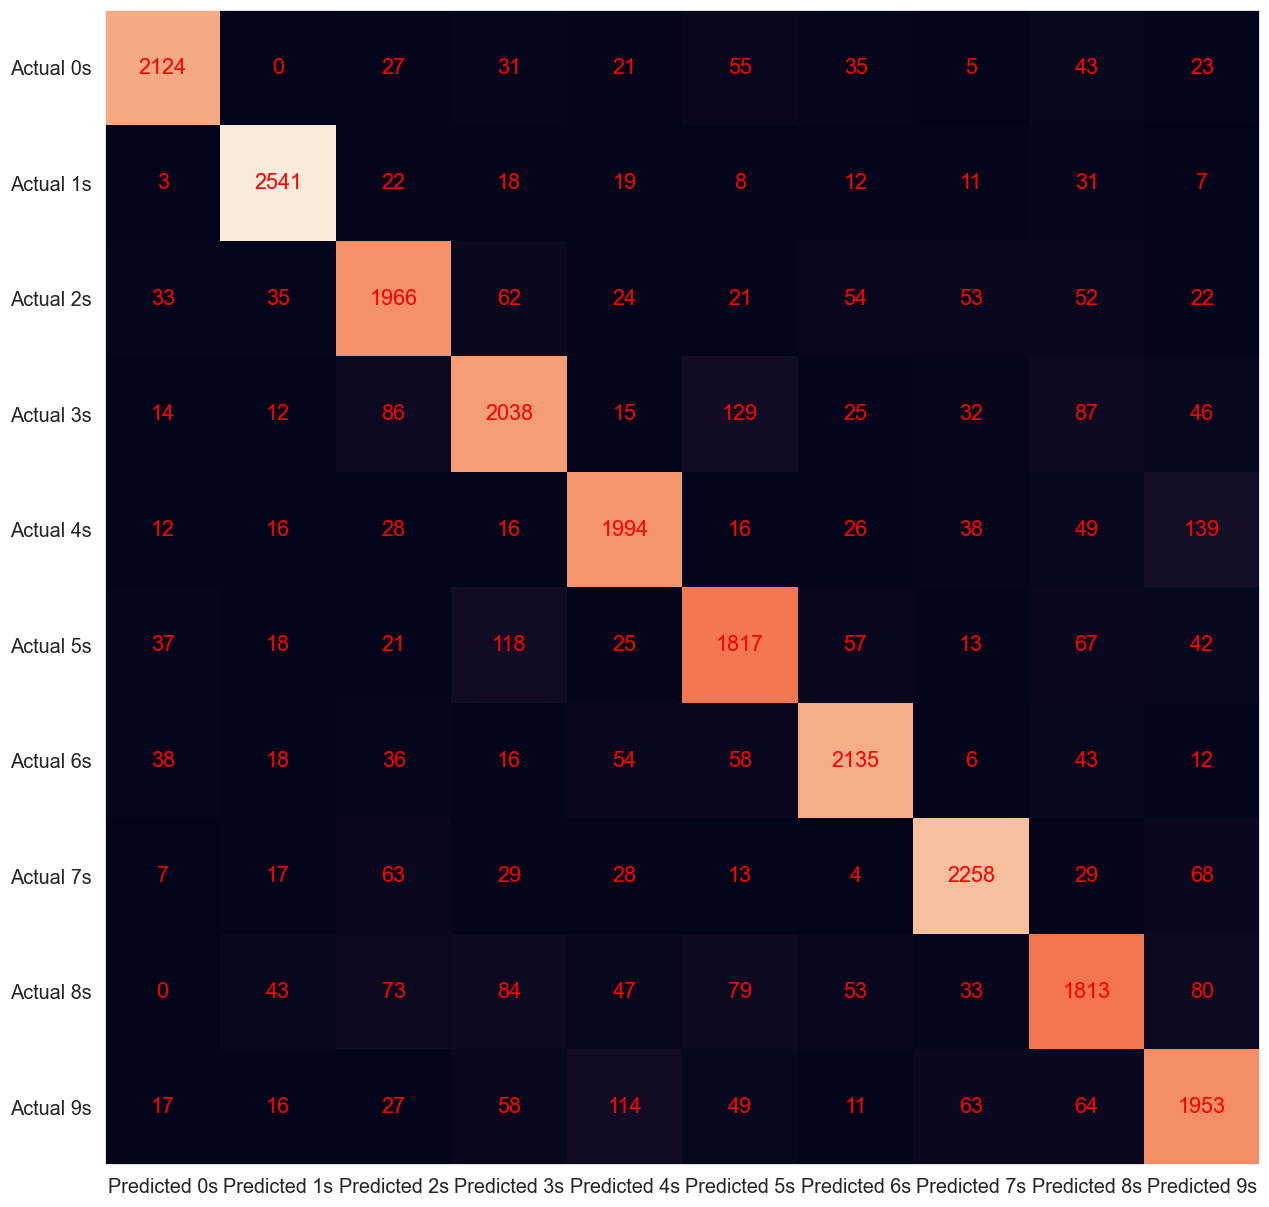

In [39]:
# Confusion matrix Plot

cm = con_mat
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2,3,4,5,6,7,8,9), ticklabels=('Predicted 0s', 'Predicted 1s','Predicted 2s','Predicted 3s', 'Predicted 4s','Predicted 5s','Predicted 6s', 'Predicted 7s','Predicted 8s','Predicted 9s'))
ax.yaxis.set(ticks=(0,1,2,3,4,5,6,7,8,9), ticklabels=('Actual 0s', 'Actual 1s','Actual 2s','Actual 3s', 'Actual 4s','Actual 5s', 'Actual 6s','Actual 7s','Actual 8s', 'Actual 9s'))
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [40]:
# report from sklearn

print("Report from Sklearn")
print(classification_report(test_lab, clf.predict(test_x)))

Report from Sklearn
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2364
           1       0.94      0.95      0.94      2672
           2       0.84      0.85      0.84      2322
           3       0.83      0.82      0.82      2484
           4       0.85      0.85      0.85      2334
           5       0.81      0.82      0.81      2215
           6       0.89      0.88      0.88      2416
           7       0.90      0.90      0.90      2516
           8       0.79      0.78      0.78      2305
           9       0.82      0.82      0.82      2372

    accuracy                           0.86     24000
   macro avg       0.86      0.86      0.86     24000
weighted avg       0.86      0.86      0.86     24000



In [41]:
# ClassWise Precision from Scratch

precision0 = ((cm[0,0]/(cm[0,0]+cm[1,0]+cm[2,0]+cm[3,0]+cm[4,0]+cm[5,0]+cm[6,0]+cm[7,0]+cm[8,0]+cm[9,0]))).round(2)
precision1 = ((cm[1,1]/(cm[0,1]+cm[1,1]+cm[2,1]+cm[3,1]+cm[4,1]+cm[5,1]+cm[6,1]+cm[7,1]+cm[8,1]+cm[9,1]))).round(2)
precision2 = ((cm[2,2]/(cm[0,2]+cm[1,2]+cm[2,2]+cm[3,2]+cm[4,2]+cm[5,2]+cm[6,2]+cm[7,2]+cm[8,2]+cm[9,2]))).round(2)
precision3 = ((cm[3,3]/(cm[0,3]+cm[1,3]+cm[2,3]+cm[3,3]+cm[4,3]+cm[5,3]+cm[6,3]+cm[7,3]+cm[8,3]+cm[9,3]))).round(2)
precision4 = ((cm[4,4]/(cm[0,4]+cm[1,4]+cm[2,4]+cm[3,4]+cm[4,4]+cm[5,4]+cm[6,4]+cm[7,4]+cm[8,4]+cm[9,4]))).round(2)
precision5 = ((cm[5,5]/(cm[0,5]+cm[1,5]+cm[2,5]+cm[3,5]+cm[4,5]+cm[5,5]+cm[6,5]+cm[7,5]+cm[8,5]+cm[9,5]))).round(2)
precision6 = ((cm[6,6]/(cm[0,6]+cm[1,6]+cm[2,6]+cm[3,6]+cm[4,6]+cm[5,6]+cm[6,6]+cm[7,6]+cm[8,6]+cm[9,6]))).round(2)
precision7 = ((cm[7,7]/(cm[0,7]+cm[1,7]+cm[2,7]+cm[3,7]+cm[4,7]+cm[5,7]+cm[6,7]+cm[7,7]+cm[8,7]+cm[9,7]))).round(2)
precision8 = ((cm[8,8]/(cm[0,8]+cm[1,8]+cm[2,8]+cm[3,8]+cm[4,8]+cm[5,8]+cm[6,8]+cm[7,8]+cm[8,8]+cm[9,8]))).round(2)
precision9 = ((cm[9,9]/(cm[0,9]+cm[1,9]+cm[2,9]+cm[3,9]+cm[4,9]+cm[5,9]+cm[6,9]+cm[7,9]+cm[8,9]+cm[9,9]))).round(2)

print("ClassWise Precision from Scratch")
print("Class0",precision0)
print("Class1",precision1)
print("Class2",precision2)
print("Class3",precision3)
print("Class4",precision4)
print("Class5",precision5)
print("Class6",precision6)
print("Class7",precision7)
print("Class8",precision8)
print("Class9",precision9)

ClassWise Precision from Scratch
Class0 0.93
Class1 0.94
Class2 0.84
Class3 0.83
Class4 0.85
Class5 0.81
Class6 0.89
Class7 0.9
Class8 0.8
Class9 0.82


In [42]:
# ClassWise Recall from Scratch

recall0 = ((cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]+cm[0,4]+cm[0,5]+cm[0,6]+cm[0,7]+cm[0,8]+cm[0,9]))).round(2)
recall1 = ((cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]+cm[1,4]+cm[1,5]+cm[1,6]+cm[1,7]+cm[1,8]+cm[1,9]))).round(2)
recall2 = ((cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]+cm[2,4]+cm[2,5]+cm[2,6]+cm[2,7]+cm[2,8]+cm[2,9]))).round(2)
recall3 = ((cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]+cm[3,4]+cm[3,5]+cm[3,6]+cm[3,7]+cm[3,8]+cm[3,9]))).round(2)
recall4 = ((cm[4,4]/(cm[4,0]+cm[4,1]+cm[4,2]+cm[4,3]+cm[4,4]+cm[4,5]+cm[4,6]+cm[4,7]+cm[4,8]+cm[4,9]))).round(2)
recall5 = ((cm[5,5]/(cm[5,0]+cm[5,1]+cm[5,2]+cm[5,3]+cm[5,4]+cm[5,5]+cm[5,6]+cm[5,7]+cm[5,8]+cm[5,9]))).round(2)
recall6 = ((cm[6,6]/(cm[6,0]+cm[6,1]+cm[6,2]+cm[6,3]+cm[6,4]+cm[6,5]+cm[6,6]+cm[6,7]+cm[6,8]+cm[6,9]))).round(2)
recall7 = ((cm[7,7]/(cm[7,0]+cm[7,1]+cm[7,2]+cm[7,3]+cm[7,4]+cm[7,5]+cm[7,6]+cm[7,7]+cm[7,8]+cm[7,9]))).round(2)
recall8 = ((cm[8,8]/(cm[8,0]+cm[8,1]+cm[8,2]+cm[8,3]+cm[8,4]+cm[8,5]+cm[8,6]+cm[8,7]+cm[8,8]+cm[8,9]))).round(2)
recall9 = ((cm[9,9]/(cm[9,0]+cm[9,1]+cm[9,2]+cm[9,3]+cm[9,4]+cm[9,5]+cm[9,6]+cm[9,7]+cm[9,8]+cm[9,9]))).round(2)

print("ClassWise Recall from Scratch")
print("Class0",recall0)
print("Class1",recall1)
print("Class2",recall2)
print("Class3",recall3)
print("Class4",recall4)
print("Class5",recall5)
print("Class6",recall6)
print("Class7",recall7)
print("Class8",recall8)
print("Class9",recall9)

ClassWise Recall from Scratch
Class0 0.9
Class1 0.95
Class2 0.85
Class3 0.82
Class4 0.85
Class5 0.82
Class6 0.88
Class7 0.9
Class8 0.79
Class9 0.82


In [43]:
# ClassWise F1 Score from Scratch
f10 = (2*(precision0*recall0)/(precision0+recall0)).round(2)
f11 = (2*(precision1*recall1)/(precision1+recall1)).round(2)
f12 = (2*(precision2*recall2)/(precision2+recall2)).round(2)
f13 = (2*(precision3*recall3)/(precision3+recall3)).round(2)
f14 = (2*(precision4*recall4)/(precision4+recall4)).round(2)
f15 = (2*(precision5*recall5)/(precision5+recall5)).round(2)
f16 = (2*(precision6*recall6)/(precision6+recall6)).round(2)
f17 = (2*(precision7*recall7)/(precision7+recall7)).round(2)
f18 = (2*(precision8*recall8)/(precision8+recall8)).round(2)
f19 = (2*(precision9*recall9)/(precision9+recall9)).round(2)

print("ClassWise F1 Score from Scratch")
print("Class0",f10)
print("Class1",f11)
print("Class2",f12)
print("Class3",f13)
print("Class4",f14)
print("Class5",f15)
print("Class6",f16)
print("Class7",f17)
print("Class8",f18)
print("Class9",f19)

ClassWise F1 Score from Scratch
Class0 0.91
Class1 0.94
Class2 0.84
Class3 0.82
Class4 0.85
Class5 0.81
Class6 0.88
Class7 0.9
Class8 0.79
Class9 0.82


# Thank You